# CS-E5740 Complex Networks,
Answers to exercise set 6 <br>
Adam Ilyas 725819

# 1. Centrality measures for undirected networks

![alt text](./assets/fig.png "A small undirected network.")

### a) Your first task is to compute/reason without a computer the first 4 centrality measures of the above list for the network shown in Fig. 1 

the 4 centrality measures:
1. degree $k(i)$: Number of neighbors of node $i$
2. betweenness centrality $bc(i)$: **Number of shortest paths between other nodes of the network that pass through node i** 
3. closeness centrality $C(i)$: Inverse of the average shortest path distance to all other nodes than i: 
4. k-shell $k_s(i)$: **Node i belongs to the k-shell, if it belongs to the k-core of the network but does not belong to the k + 1-core.**

1. degree $k(i)$: Number of neighbors of node $i$ <br>

Node | Degree $k(i)$
--- | --- | ---
A | 2
B | 3
C | 4
D | 1
E | 2

2. betweenness centrality $bc(i)$: **Number of shortest paths between other nodes of the network that pass through node i** <br><br>
Formally, if $\sigma_{st}$ is the number of shortest paths from s to t and
$\sigma_{sit}$ the number of such paths that contain i, then 
    $$bc(i) = \frac{1}{(N-2)(N-1)} \sum_{s \neq i} \sum_{t \neq i} \frac{\sigma_{sit}}{\sigma_{st}}$$
where N = 5
$$bc(i) = \frac{1}{12} \sum_{s \neq i} \sum_{t \neq i} \frac{\sigma_{sit}}{\sigma_{st}}$$

node A, D, E does not lie on any shortest path (which does not start or end at itself)

node B lies on the shortest path $A \rightarrow B \rightarrow E$

node C lies on the following shortest paths (7):
- $A \rightarrow C \rightarrow E$
- $A \rightarrow C \rightarrow D$
- $B \rightarrow C \rightarrow D$
- $D \rightarrow C \rightarrow A$
- $D \rightarrow C \rightarrow B$
- $D \rightarrow C \rightarrow E$
- $E \rightarrow C \rightarrow A$
- $E \rightarrow C \rightarrow D$

Node |betweenness centrality
--- | --- | ---
A | 0
B | 1/12
C | 7/12
D | 0
E | 0

3. closeness centrality $C(i)$: Inverse of the average shortest path distance to all other nodes than i: 
$$C(i) = \frac{N-1}{\sum_{v \neq i} d(i, v)}$$, N=5

Node | sum of shortest path | closeness centrality $C(i)$
--- | --- | ---
A | 6 | 2/3
B | 5 | 4/5
C | 4 | 1
D | 7 | 4/7
E | 6 | 2/3

4. k-shell $k_s(i)$: **Node i belongs to the k-shell, if it belongs to the k-core of the network but does not belong to the k + 1-core.**

The k-core is the maximal subnetwork (i.e. the largest possible subset of
the network’s nodes, and the links between them) where all nodes have at least degree k.

In other words, the 1-core is formed by removing nodes of degree 0 (isolated nodes) from
the network, the 2-core is formed by removing nodes of degree 1 and iteratively removing
the nodes that become degree 1 or 0 because of the removal, and so on. 

The 1-shell is then the set of nodes that was removed from the 1-core to obtain the 2-core.<br><br>

i-core | set of nodes
--- | ---
1-core | {A,B,C,D,E}
2-core | {A,B,C,E}
3-core | {}

### b) Use NetworkX to compute all five centrality measures for the networks
shown in Fig 2 

![alt text](./assets/fig2.png "The model networks")

Figure 2: The model networks. 
a) A simple ring lattice with N = 20. <br>
b) A simple 2D-lattice with k = 4, L = 7, (N = 49). <br>
c) A Cayley tree with k = 3, and l = 4

**Visualize** 
- betweenness, 
- closeness, 
- k-shell, 
- eigenvector centrality

as a function
of degree in a scatter plot for each of the networks.

For easier visual comparison
of the measures, you should normalize the k-shell values by dividing them by the maximal k-shell value. 

### c) To highlight the differences between the centrality measures, plot five visualizations for all the networks studied in b) 
(the ring lattice, the 2D-lattice, the Cayley tree and the Karate club network), each time using one of the centrality mea-
sures to define the colors of the network nodes.

In [6]:
import os
if not os.path.isdir("image_1"):
    os.makedirs("image_1")

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from centrality_measures_for_undirected_networks import create_scatter
from centrality_measures_for_undirected_networks import visualize_on_network
from centrality_measures_for_undirected_networks import get_centrality_measures

%matplotlib inline

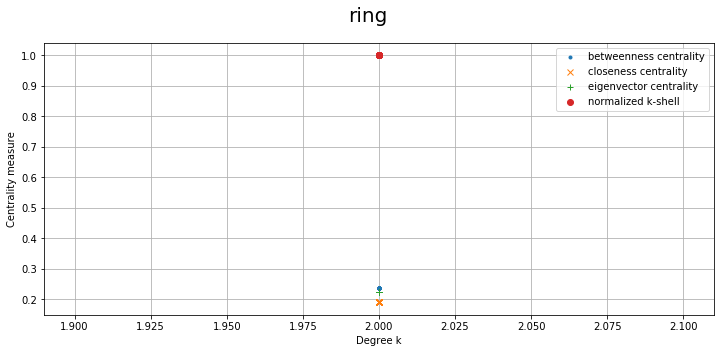

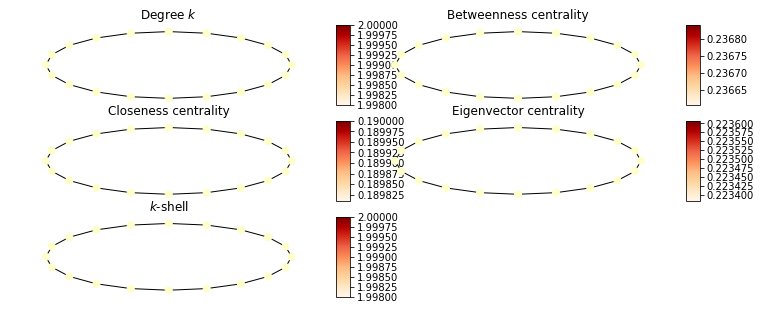

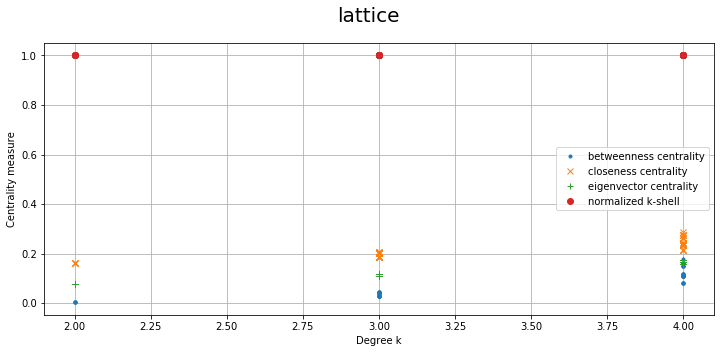

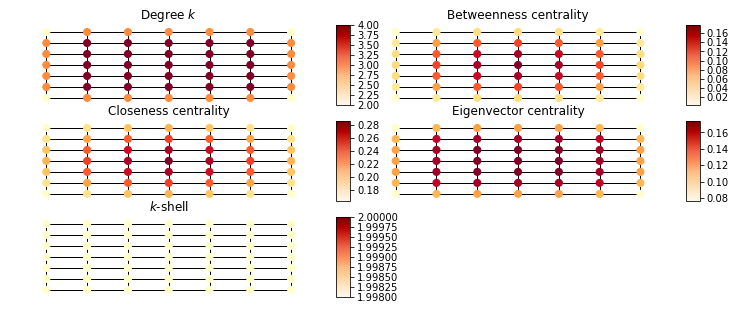

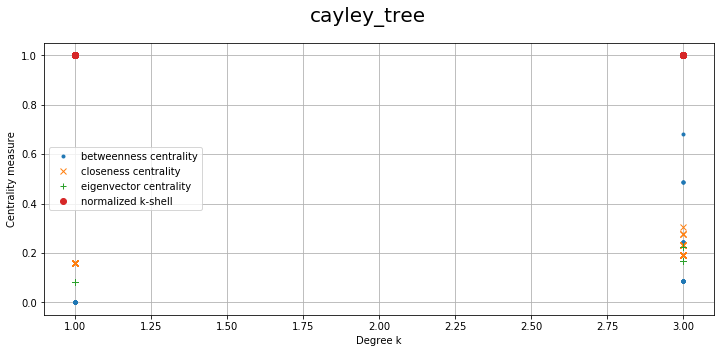

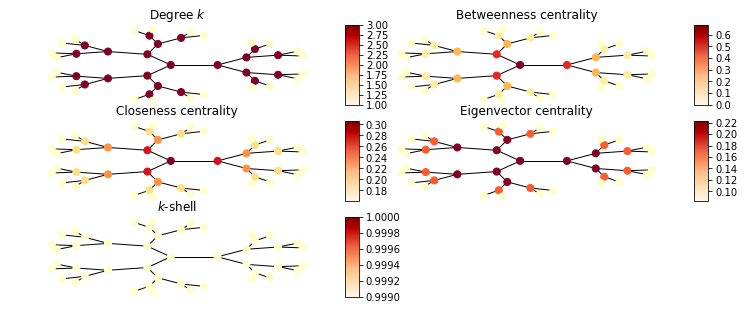

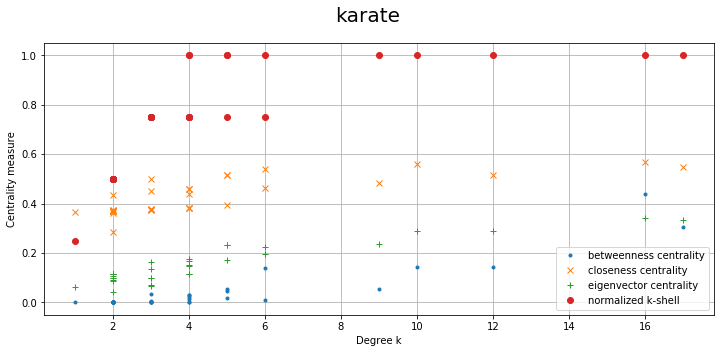

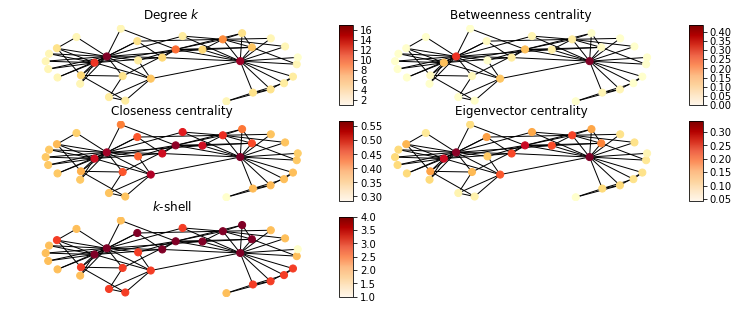

In [7]:
network_paths = ['.data/small_ring.edg',
                 '.data/larger_lattice.edg',
                 '.data/small_cayley_tree.edg',
                 '.data/karate_club_network_edge_file.edg']
coords_paths = ['.data/small_ring_coords.pkl',
                '.data/larger_lattice_coords.pkl',
                '.data/small_cayley_tree_coords.pkl',
                '.data/karate_club_coords.pkl']
network_names = ['ring', 'lattice', 'cayley_tree', 'karate']

x_label = 'Degree k'
y_label = 'Centrality measure'
labels = ['betweenness centrality', 'closeness centrality',
          'eigenvector centrality', 'normalized k-shell']
markers = ['.', 'x', '+', 'o']
scatter_base_path = './centrality_measures_scatter'
titles = ['Degree $k$', 'Betweenness centrality',
          'Closeness centrality', 'Eigenvector centrality', '$k$-shell']
network_base_path = './network_figures'

fig_index = 0
tol = 10**-1 # tolerance parameter for calculating eigenvector centrality

# Loop through all networks
data = zip(network_paths, network_names, coords_paths)
for (network_path, network_name, coords_path) in data:
    if network_name == 'karate':
        network = nx.read_weighted_edgelist(network_path)

    else:
        network = nx.read_edgelist(network_path)
        
    # Calculating centrality measures
    centrality_measures = get_centrality_measures(network, tol)
    [degree, betweenness, closeness, eigenvector_centrality, kshell] = centrality_measures
    kshell_normalized = kshell/float(np.max(kshell)) # normalization
    # Scatter plot
    y_values = [betweenness, closeness, eigenvector_centrality, kshell_normalized]
    scatter_path = scatter_base_path + '_' + network_name + '.png'

    fig = create_scatter(degree, y_values, x_label, y_label, labels, markers)
    fig.suptitle(network_name, size=20)
    plt.show()
    fig.savefig("image_1/" + scatter_path)


    # Network figures
    network_figure_path = network_base_path + '_' + network_name + '.png'
    all_cvalues = [degree, betweenness, closeness, eigenvector_centrality, kshell]
    fig=visualize_on_network(network, all_cvalues,
                             coords_path, titles)
    
    fig.savefig("image_1/" + network_figure_path)

### d) Based on the results of a) and b), how do these centralities differ from each other? 

Would you say that some of them do a better or worse job than others in identifying
central nodes? To answer the questions, you can for example pick some representative
nodes and try to explain why different centrality measures rank these nodes differently
regarding its centrality. In your answer, briefly cover all the networks visualized in c).

**Ans** 

The **k-shell centrality** only works on the karate network. It gives value of how similar two well-connected nodes are.

The **betweenness centrality** depends on the shortest paths. **closeness centrality** is depends on the distance of a node to other nodes. It is interesting to see that both of these centralities produce quite similar results as one another, as observed in the 2d-lattice and cayley trees. These two centralities give higher values to nodes in the centre (which we can deem as more important) and the further away from the center, the lower the values become

The **Eigenvector centrality** is depends on node degrees of the own nodes as well as the neighbours node.
This centrality seems to perform somewhere between the **degree** centrality and the **betweeness/ closeness**

# 2. Degree correlations and assortativity

In this problem, we consider degree correlations and assortativity of two real-world networks:
- the Zachary karate club network (`karate_club_network_edge_file.edg`)
- a snowball-sampled subgraph of a Facebook friendships network (`facebook-wosn-links_subgraph.edg`). 

For both networks, perform the following analyses:

### a) Create a scatter plot of the degrees of pairs of connected nodes. 

That is, take
- each connected pair of nodes $(i,j)$, 
- take their degrees $k_i$ and $k_j$ , 
- plot the point ($k_i$ , $k_j$ ) on two axes with degrees as their units, and 
- repeat for all pairs of connected nodes. 

Because
the network is undirected, the plot should be symmetrical, containing points ($k_i$ , $k_j$ ) and
($k_j$ , $k_i$ ) for all connected pairs ($i,j$).

### b) Produce a heat map 1 of the degrees of all connected nodes.

The heat map uses
the same information as you used in a), that is, the degrees of pairs of connected nodes.
However, no points are plotted: rather, the two degree axes are binned and the number
of degree pairs ($k_i$ , $k_j$ ) in each bin is computed. Then, the bin is colored according to this
number (e.g., red = many connected pairs of nodes with degrees falling in the bin). 

- What extra information do you gain by using a he1atmap instead of just a scatter plot (if any)?
**Ans** The heat maps offers 1 more dimension of data, Frequency/Occurence/Count of that combination of pair of node, via color.

In [8]:
from degree_correlations_assortativity import create_scatter
from degree_correlations_assortativity import create_heatmap
from degree_correlations_assortativity import visualize_nearest_neighbor_degree

from degree_correlations_assortativity import get_x_and_y_degrees
from degree_correlations_assortativity import assortativity
from degree_correlations_assortativity import get_nearest_neighbor_degree
from degree_correlations_assortativity import get_simple_bin_average

In [9]:
import os
if not os.path.isdir("image_2"):
    os.makedirs("image_2")

In [10]:
network_paths = ['./data/karate_club_network_edge_file.edg',
                 './data/facebook-wosn-links_subgraph.edg']
network_names = ['karate', 'facebook']
network_titles = ['Karate Club Network',
                  'Facebook Friendship Network']
scatter_figure_base = './image_2/edge_degree_correlation_scatter_'
heatmap_figure_base = './image_2/heatmap_'
nearest_neighbor_figure_base = './image_2/nearest_'

Own assortativity for Karate Club Network: -0.47136675756640545
NetworkX assortativity for Karate Club Network: -0.47561309768461457


/home/adam/Desktop/work/complex-networks/week6/code/degree_correlations_assortativity.py:224: RuntimeWarning: invalid value encountered in double_scalars
  bin_average[i] = bin_average[i]/denominator


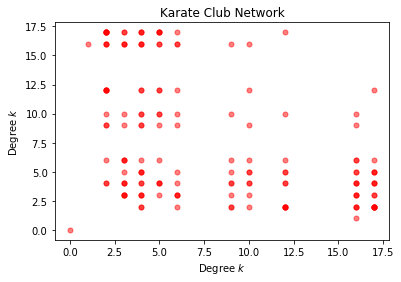

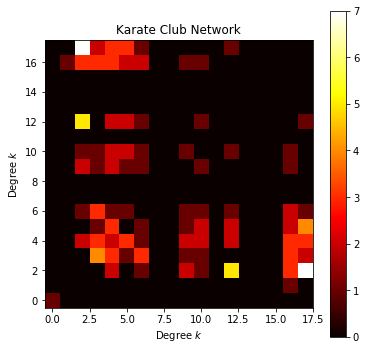

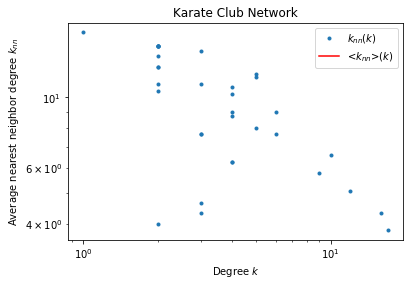

Own assortativity for Facebook Friendship Network: 0.05596269693739395
NetworkX assortativity for Facebook Friendship Network: 0.05598478476593048


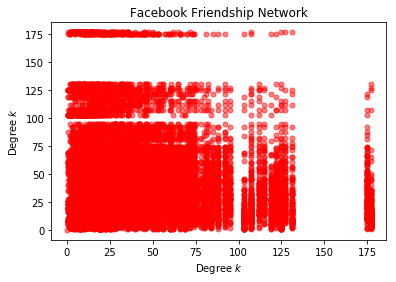

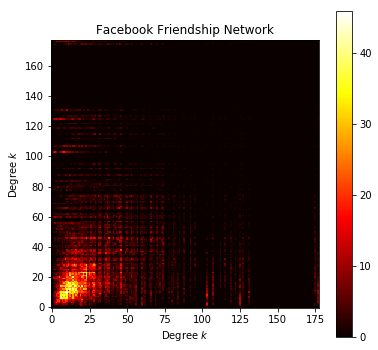

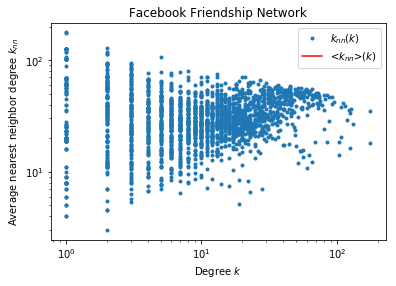

In [11]:
# Loop through all networks

data = zip(network_paths, network_names, network_titles)
for network_path, network_name, network_title in data:
    network = nx.read_weighted_edgelist(network_path)
    x_degrees, y_degrees = get_x_and_y_degrees(network)

    fig = create_scatter(x_degrees, y_degrees, network_title)
    fig.savefig(scatter_figure_base+network_name+'.pdf')

    fig = create_heatmap(x_degrees, y_degrees, network_title)
    fig.savefig(heatmap_figure_base+network_name+'.pdf')

    # assortativities
    assortativity_own = assortativity(x_degrees, y_degrees)
    assortativity_nx = nx.degree_assortativity_coefficient(network)
    print("Own assortativity for " + network_title + ": " +
          str(assortativity_own))
    print("NetworkX assortativity for " + network_title + ": " +
          str(assortativity_nx))

    # nearest neighbor degrees
    degrees, nearest_neighbor_degrees = get_nearest_neighbor_degree(network)
    unique_degrees, mean_nearest_neighbor_degrees = get_simple_bin_average(
        degrees,
        nearest_neighbor_degrees
    )
    fig = visualize_nearest_neighbor_degree(degrees,
                                            nearest_neighbor_degrees,
                                            unique_degrees,
                                            mean_nearest_neighbor_degrees,
                                            network_title)
    fig.savefig(nearest_neighbor_figure_base + network_name + '.pdf')
    plt.show()

### c) 

The assortativity coefficient is defined as the Pearson correlation coefficient of the
degrees of pairs of connected nodes. Calculate the assortativity coefficient of the
network using `scipy.stats.pearsonr` and compare your result with the output of `NetworkX` function `degree_assortativity_coefficient`. As mentioned in the lecture, social
networks typically are assortative. 

**Ans.**
Karate Club Network
- Own assortativity for Karate Club Network: -0.47136675756640545
- NetworkX assortativity for Karate Club Network: -0.47561309768461457

Facebook Friendship Network
- Own assortativity for Facebook Friendship Network: 0.05596269693739395
- NetworkX assortativity for Facebook Friendship Network: 0.05598478476593048

### Does this hold for these two social networks? What could explain this result?

**Ans.** 
- Karate Club  is not assortative (-0.47 Negative) due to conflicts in the club, forming 2 clusters, leading to the split of the club
- The Facebook Friendship network is assortative (0.055 Positive), as it is a social network.


### d) For each node, compute the average nearest neighbour degree $k_{nn}$ and
make a scatter plot of $k _{nn}$ as a function of $k$. In the same plot, plot also the curve
of $\langle k_{nn} \rangle (k)$ as a function of $k$, i.e. the averaged $k_{nn}$ for each $k$. Comment the result
from the viewpoint of assortativity.

**Ans.** Particularly for a larger network such as the facebook friendship network, with a larger degree, we can be more confident that it's neighbours also has a large degree.

This means that high-degree nodes link to other high-degree nodes.

We can explain this through homophily, where people tend to form social ties to others like them.

# 3 Bipartite networks

Consider the bipartite network of actors and movies shown in Figure 3.

![alt text](./assets/fig3.png "A small undirected network.")

### a) Construct the two unipartite projections of the network – the network of actors and the network of movies.
In the former, actors are linked if they have acted together
in at least one movie, and in the latter, movies are linked if there is at least one common
actor.

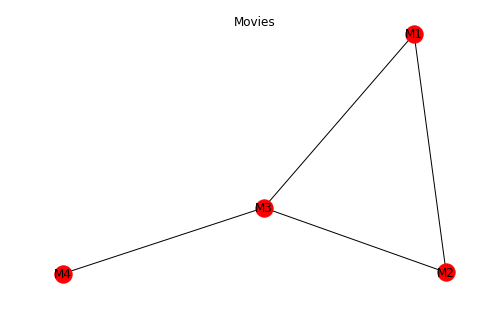

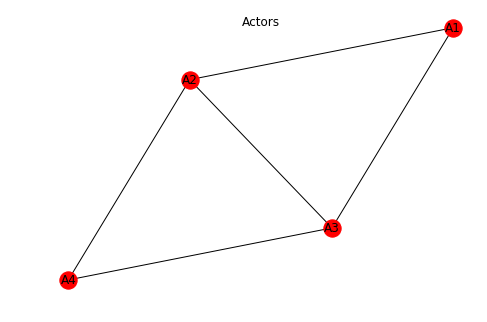

In [12]:
from networkx.algorithms import bipartite

fig = nx.Graph()

fig.add_nodes_from(['M1', 'M2', 'M3', 'M4'], bipartite=0)
fig.add_nodes_from(['A1', 'A2', 'A3', 'A4'], bipartite=1)

fig.add_edges_from([('M1', 'A1'), ('M1', 'A2'),
                    ('M2', 'A1'), ('M2', 'A3'),                    
                    ('M3', 'A2'), ('M3', 'A3'),  
                    ('M3', 'A4'), ('M4', 'A4')])

movies, actors = bipartite.sets(fig)

plt.suptitle("Movies")
nx.draw(bipartite.projected_graph(B=fig, nodes=movies), with_labels=True)
plt.show()

plt.suptitle("Actors")
nx.draw(bipartite.projected_graph(B=fig, nodes=actors), with_labels=True)
plt.show()

### b) Show that, in general, it is not possible to uniquely reconstruct a bipartite network from its two unipartite projections. 

Prove this by providing a counterexample: Take
the same 4 actors and 4 movies, and design a different bipartite network that has exactly
the same unipartite projections. That is, connect the actors and movies in some way that
results in the same projections as in a).

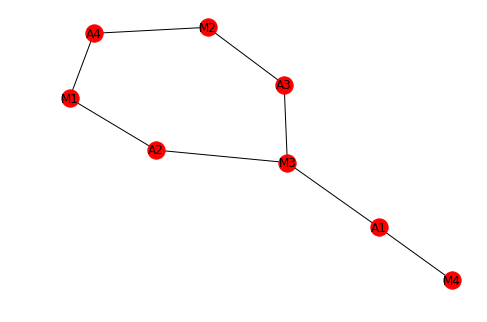

In [14]:
fig2 = nx.Graph()

fig2.add_nodes_from(['M1', 'M2', 'M3', 'M4'], bipartite=0)
fig2.add_nodes_from(['A1', 'A2', 'A3', 'A4'], bipartite=1)

fig2.add_edges_from([('M1', 'A4'), ('M1', 'A2'),
                    ('M2', 'A4'), ('M2', 'A3'),                    
                    ('M3', 'A2'), ('M3', 'A3'),  
                    ('M3', 'A1'), ('M4', 'A1')])

nx.draw(fig2, with_labels=True)

**Ans. **Here, we have a different bipartite graphs, however, as shown below, with the same unipartite graphs as our first bipartite graph

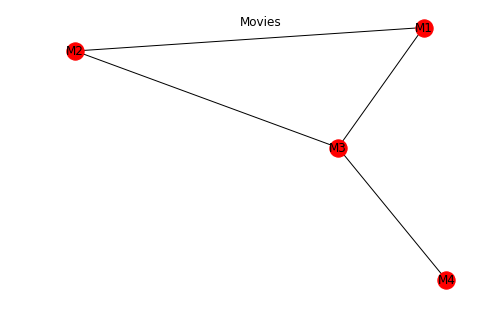

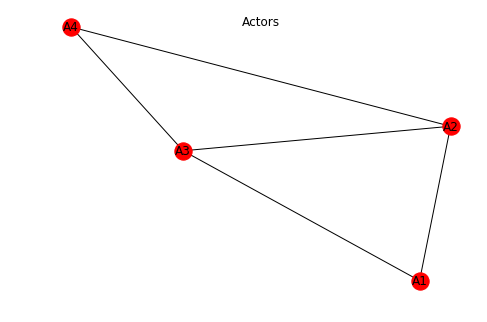

In [15]:
plt.suptitle("Movies")
nx.draw(bipartite.projected_graph(B=fig2, nodes=movies), with_labels=True)
plt.show()

plt.suptitle("Actors")
nx.draw(bipartite.projected_graph(B=fig, nodes=actors), with_labels=True)
plt.show()